In [14]:
%cd ..
from catalog_query import get_VVV_catalog
import cutout_manager as cm
import vvv_plots as vvv

import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table


import regions
from regions import Regions
import importlib as imp

imp.reload(vvv)
%cd notebooks

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament
/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/notebooks


In [2]:
pos_ctr = SkyCoord('17:46:20.9063719501', '-28:37:51.6942550990', unit=(u.hourangle, u.deg))

In [3]:
position_HMSFR = SkyCoord('17:46:21.4669695284', '-28:35:38.1118497742', unit=(u.hourangle, u.deg))


In [4]:
cutout_405 = cm.get_cutout_405(position_HMSFR, 8*u.arcmin, 3*u.arcmin)#, basepath='~/research/Research/JWST/')

In [15]:
#cat_VVV = get_VVV_catalog(position_HMSFR, w=3*u.arcmin, l=8*u.arcmin)
#get_VVV_catalog(pos_ctr, w=2*u.arcmin, l=2*u.arcmin)
cat_VVV = Table.read('/orange/adamginsburg/jwst/cloudc/catalogs/jw02221-o002_t001_nircam_clear-f405n-merged_vvvcat.fits')
print(len(cat_VVV))

9945


In [13]:
cat_VVV.columns

<TableColumns names=('RAJ2000','DEJ2000','iauname','mClass','Zmag3','e_Zmag3','Zperrbits','Ymag3','e_Ymag3','Yperrbits','Jmag3','e_Jmag3','Jperrbits','Hmag3','e_Hmag3','Hperrbits','Ksmag3','e_Ksmag3','Ksperrbits','RA','DEC','skycoord')>

In [16]:
catalog_VVV = vvv.VVVCatalog(cat_VVV)

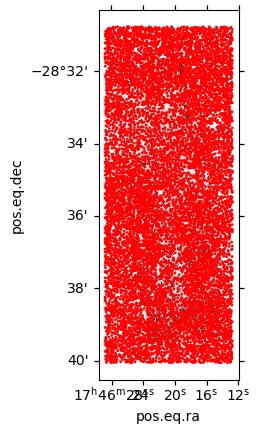

In [10]:
ax = plt.subplot(projection=cutout_405.wcs)

ax.imshow(cutout_405.data, cmap='Greys', vmin=0, vmax=50)
ax.scatter(catalog_VVV.ra, catalog_VVV.dec, transform=ax.get_transform('world'), s=1, facecolor='none', edgecolor='red')

why


<Axes: xlabel='[H] - [KS]', ylabel='[KS]'>

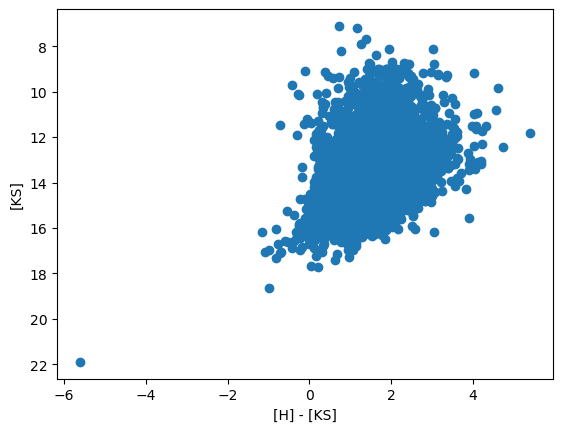

In [17]:
#color = cat_VVV['H1ap1'] - cat_VVV['Ks1ap1']
#mag = cat_VVV['Ks1ap1']
#
#plt.figure()
#plt.scatter(color, mag)
#
#plt.gca().invert_yaxis()
#plt.xlabel('H-Ks')
#plt.ylabel('Ks')

catalog_VVV.plot_CMD('H', 'Ks', 'Ks')

why
why
why


/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/matplotlib/cbook.py:1699: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


<Axes: xlabel='[J] - [H]', ylabel='[H]'>

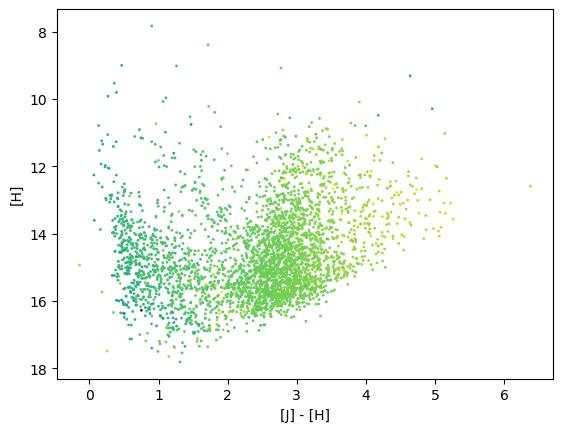

In [23]:
#color = cat_VVV['J1ap1'] - cat_VVV['H1ap1']
#mag = cat_VVV['H1ap1']
color2 = catalog_VVV.color('J', 'H')
#cat_VVV['H1ap1'] - cat_VVV['Ks1ap1']
#
#plt.figure()
#im = plt.scatter(color, mag, c=color2, cmap='viridis')
#
#plt.gca().invert_yaxis()
#plt.ylabel('H')
#plt.xlabel('J-H')
#plt.colorbar(im, label='H-Ks')

catalog_VVV.plot_CMD('J', 'H', 'H', c=catalog_VVV.color('H', 'Ks'), s=1)

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/matplotlib/cbook.py:1699: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


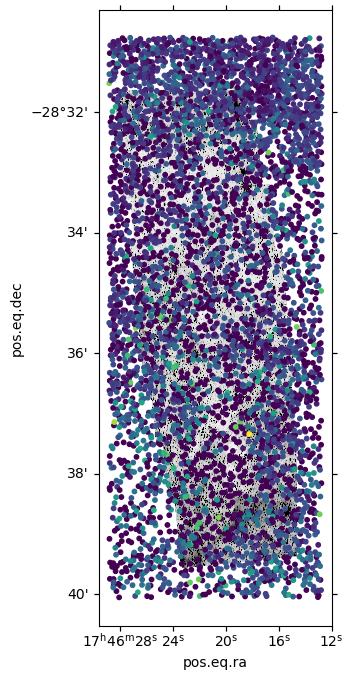

In [28]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(projection=cutout_405.wcs)

ax.imshow(cutout_405.data, cmap='Greys', vmin=0, vmax=50)
ax.scatter(cat_VVV['RAJ2000'], cat_VVV['DEJ2000'], transform=ax.get_transform('world'), s=10, facecolor='none', c=color2, cmap='viridis', vmin=2, vmax=6)

why
why


/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/matplotlib/cbook.py:1699: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


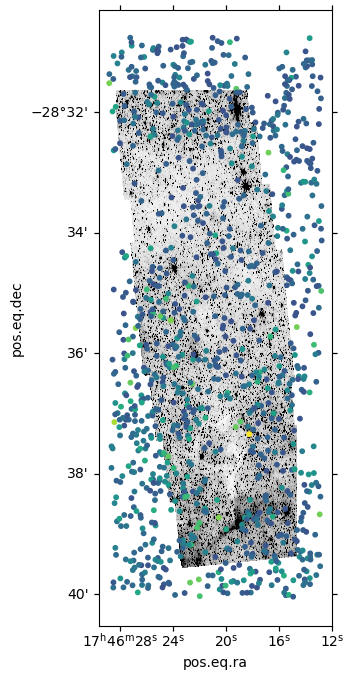

In [33]:
red_mask = catalog_VVV.color('J', 'H') > 3
cat_red = vvv.VVVCatalog(cat_VVV[red_mask])

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(projection=cutout_405.wcs)

ax.imshow(cutout_405.data, cmap='Greys', vmin=0, vmax=50)
ax.scatter(cat_red.ra, cat_red.dec, transform=ax.get_transform('world'), s=10, facecolor='none', c=cat_red.color('J', 'H'), cmap='viridis', vmin=2, vmax=6)

why
why
why


(-2.0, 3.0)

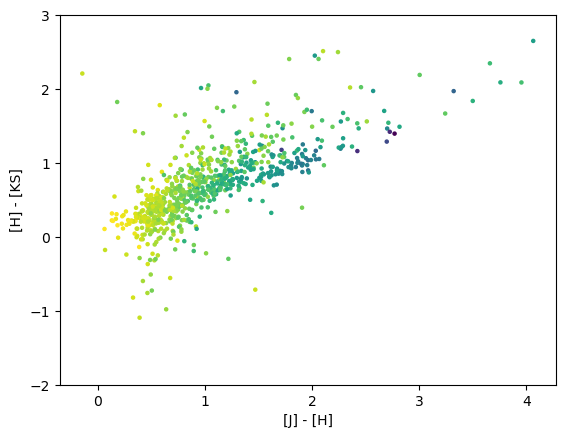

In [27]:
#color1 = cat_VVV['J1ap1'] - cat_VVV['H1ap1']
#color2 = cat_VVV['H1ap1'] - cat_VVV['Ks1ap1']
#
#plt.figure()
#plt.scatter(color, mag)
#
#plt.gca().invert_yaxis()
#plt.xlabel('J-H')
#plt.ylabel('H')

ax = plt.subplot()
catalog_VVV.plot_CCD('J', 'H', 'H', 'Ks', s=5, c=catalog_VVV.color('J', 'Z'), cmap='viridis', ax=ax)
ax.set_ylim(-2, 3)
